# Headsize-Brainweight  Project

Generally, the headsize of humans gives impressions of the weight of brain. In this case, head brain file consist of four attributes (Gender ,Age ,headsize, brainweight) .

One has to train the machine for learning the size of head and corresponding brainweight. Then predict the brain weight given on certain size.

Consider

Headsize -   input variable

Brainweight – output variable

Complete the exploratory data analysis.
Apply the linear regression model using training and testing phase


Steps Performed to solve this problem.
    
    
    1) Import the Required Libraries
    
    
    2) Read headbrain.txt file and seperator is tab insted of | or , 
    
    ----------------------------
        

In [530]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [531]:
datafrm=pd.read_csv('headbrain.CSV')

Checking first and last 5 rows of data

In [532]:
datafrm.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [533]:
datafrm.tail()

,Gender,AgeRange,HeadSize,BrainWeight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


Checking the structure of dataframes and null values in particular columns and dataframe

In [534]:
datafrm.shape

(237, 4)

In [535]:
datafrm.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000




HeadSize and BrainWeight having large gap between 75% and Max Value. So Outliers are Present in both the coulumns.


Positive Skewness is also there because mean is greater than median

In [536]:
datafrm['HeadSize'].isnull().values.any()

False

In [537]:
datafrm['BrainWeight'].isnull().values.any()

False

In [538]:
datafrm.isnull().values.any()

False

In [539]:
datafrm.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [540]:
datafrm.isnull().sum

<bound method DataFrame.sum of      Gender  AgeRange  HeadSize  BrainWeight
0     False     False     False        False
1     False     False     False        False
2     False     False     False        False
3     False     False     False        False
4     False     False     False        False
..      ...       ...       ...          ...
232   False     False     False        False
233   False     False     False        False
234   False     False     False        False
235   False     False     False        False
236   False     False     False        False

[237 rows x 4 columns]>

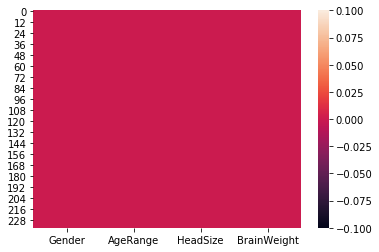

In [541]:
sns.heatmap(datafrm.isnull())

No NULL values are present in our dataset. 

Now Check the Outliers using Box plot


Gender            AxesSubplot(0.125,0.536818;0.352273x0.343182)
AgeRange       AxesSubplot(0.547727,0.536818;0.352273x0.343182)
HeadSize             AxesSubplot(0.125,0.125;0.352273x0.343182)
BrainWeight       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

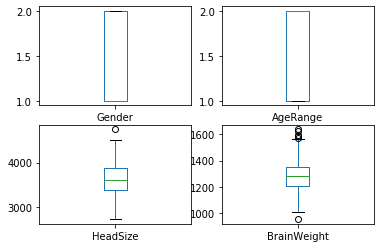

In [542]:
datafrm.plot(kind='box',subplots=True,layout=(2,2))

Now Check Outliers using ZScore. Import the required package

In [543]:
from scipy.stats import zscore

In [544]:
z=np.abs(zscore(datafrm))
z

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

In [545]:
threshold=3
print(np.where(z>3))

(array([24], dtype=int64), array([2], dtype=int64))


In [546]:
z[24][2]   # Row and Column no for outliers from abouve output

3.0536047510297246

In [547]:
datafrm[24:25]

,Gender,AgeRange,HeadSize,BrainWeight
24,1,1,4747,1635


Check the SkewNess and if present then remove it for proper dataset

if mean is greater than Median then Positive Skew
and means is less than median then negative skew


From datafrm.describe() output we can check Skewness and Outlies

2 Methods to remove skewness 


    1) Numpy Package
datafrm['HeadSize']=np.log(datafrm['HeadSize'])




datafrm['HeadSize'].plot.hist()



    2) Stats Package BoxCOx
from scipy.stats import boxcox



datafrm['BrainWeight']=boxcox(datafrm['BrainWeight'],0)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD48144B08>,
      dtype=object)

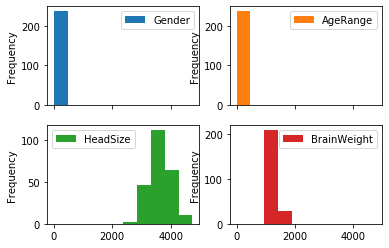

In [548]:
datafrm.plot(kind='hist',subplots=True,layout=(2,2))

-------------------------------------------------------------------
#datafrm['HeadSize']=np.log(datafrm['HeadSize'])
from scipy.stats import boxcox
datafrm['HeadSize']=boxcox(datafrm['HeadSize'],0.5)
datafrm['HeadSize'].plot.hist()

datafrm['BrainWeight']=boxcox(datafrm['BrainWeight'],0.5)

datafrm['BrainWeight'].plot.hist()

------------------------------------

In [549]:
datafrm.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

------------------------

If skew value is less than + or - 0.5 then we can ignore b ut if values are greated that + or - 0.5 then we need to remove the skewness using above mentioned methods.

----

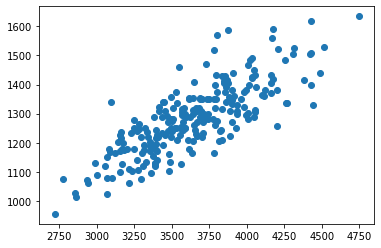

In [550]:
plt.scatter(datafrm['HeadSize'],datafrm['BrainWeight'])

--------------


Checking CoRelation between columns


Positive Corelation is there for HeadSize and BrainWeight

In [551]:
corr=datafrm['HeadSize'].corr(datafrm['BrainWeight'])
corr

0.7995697092542962

In [552]:
datafrm.corr(method='pearson')

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.088652,-0.514050,-0.465266
AgeRange,-0.088652,1.000000,-0.105428,-0.169438
HeadSize,-0.514050,-0.105428,1.000000,0.799570
BrainWeight,-0.465266,-0.169438,0.799570,1.000000


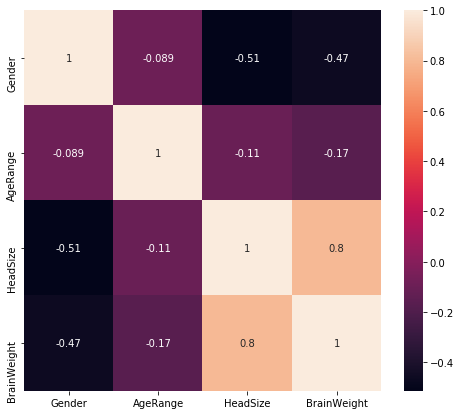

In [553]:
corr=datafrm.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True)
plt.show()

Strong Positive corelation is there between HeadSize and BrainWeight so our x(input) will be HeadSize and y(output) will be BrainWeight

Remove Strong Negative columns from dataframe or consider only Positive Relation columns



Remove Outliers Now

In [554]:
datafrm=datafrm[(z<3).all(axis=1)]

In [555]:
datafrm.tail()

,Gender,AgeRange,HeadSize,BrainWeight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [556]:
datafrm.shape

(236, 4)

-------------------------

Create input and output for linear Regression

Also use scaling methode so that all the X and Y values will be normalized . So X anf Y will be in same scale.

--------

In [557]:
#x=datafrm.iloc[:,-1].values
#y=datafrm.iloc[:,-1].values
#Reshape the array as it is 1D so Convert it into 2D using reshape function
#x=x.reshape(-1,1)
#y=y.reshape(-1,1)


x=datafrm[['HeadSize']]
y=datafrm[['BrainWeight']]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x,y

(array([[ 2.46589809],
        [ 0.30372296],
        [ 1.7647276 ],
        [ 0.41266977],
        [ 1.53007294],
        [-0.12368375],
        [ 0.43501784],
        [-0.19631495],
        [-0.04546553],
        [ 0.9853389 ],
        [-0.52036187],
        [ 1.01606748],
        [ 0.02995919],
        [ 1.61667168],
        [ 0.56631271],
        [ 0.68922706],
        [-0.36951244],
        [-0.45611119],
        [-1.49250262],
        [ 2.22006939],
        [ 0.69481407],
        [ 1.1641234 ],
        [ 0.48809449],
        [ 0.22550474],
        [ 2.21727589],
        [ 1.13618832],
        [ 1.09707921],
        [-0.48963328],
        [ 1.52448592],
        [ 0.44060485],
        [ 0.46574642],
        [ 1.32335335],
        [ 1.48537681],
        [ 1.47699629],
        [ 0.51602957],
        [-0.28570721],
        [ 0.33165804],
        [-0.82485423],
        [-0.38347998],
        [ 0.92946874],
        [-0.34716438],
        [ 1.91557703],
        [ 0.48809449],
        [ 0

----



As per the Corelation table 

Here x 'HeadSize' is independent and Y 'BrainWeigh' is dependent on x and having contineous data. 

So we will implement Linear Regression


In [558]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split



---------------------------------------------

Splitting the data into training and testing data.


Passing data to train_test_split

x is input


y is output

test_size = 0.30 i.e 30 % is test data and 70% is training data


Random_state=42  i.e seed value 




Then we will pass the Training value to fit methode of LinearRegression


And Test data to Predict methode of LinearRegression





--------------------------------------


------------------------------------------------------

Find out the Error now between Predict and Actual value


------------------------------------------------

--------------------------------------------

r2 Value :- Coefficient of determination 

change in value of y (output) when x (input) is being changed

---------------------------------

In [559]:
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso,Ridge


def trn_tst_split(input,output,rs=0):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rs)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred_val=lm.predict(x_test)
    return r2_score(y_test,pred_val)
d={}

for i in range(42,100):
    scr = trn_tst_split(x,y,i)
    if scr > .50:
        d[i]=scr
        #print('Random_value is : ',i, 'Score is : ',scr)
random_st = max(d , key=d.get)

print('Random_value is : ',random_st, 'r2 Score is : ',d[random_st])



Random_value is :  52 r2 Score is :  0.7814049973715858


In [560]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=random_st)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred_val=lm.predict(x_test)

# r2 Value :- Coefficient of determination 


print('---------------------------------------------------------')
print  ( 'r2 value is :', r2_score(y_test,pred_val))
print('---------------------------------------------------------')

print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_val))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_val))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_val)))
print('---------------------------------------------------------')



print('------------Regularization---------')

lst=[0.00001,0.0001,0.001,0.01]
for i in lst:
    ls=Lasso(alpha=i)
    ls.fit(x_train,y_train)
    print('LASSO for alpha value :' , i ,'score is ', ls.score(x_train,y_train))
    
for i in lst:
    ls=Ridge(alpha=i)
    ls.fit(x_train,y_train)
    print('Ridge for alpha value :' , i ,'score is ', ls.score(x_train,y_train))

for i in lst:
    el=ElasticNet(alpha=i)
    el.fit(x_train,y_train)
    pred_val=el.predict(x_test)
    print('ElasticNet alpha is ',i,'score is ',el.score(x_train,y_train))

---------------------------------------------------------
r2 value is : 0.7814049973715858
---------------------------------------------------------
---------------------------------------------------------
Error :
Mean Absolute Error :  57.585091761586
Mean Squared Error :  4746.168757660987
Root Mean Squared Error :  68.89244340028148
---------------------------------------------------------
------------Regularization---------
LASSO for alpha value : 1e-05 score is  0.5495103318058459
LASSO for alpha value : 0.0001 score is  0.5495103318048983
LASSO for alpha value : 0.001 score is  0.5495103317101275
LASSO for alpha value : 0.01 score is  0.5495103222330404
Ridge for alpha value : 1e-05 score is  0.5495103318058536
Ridge for alpha value : 0.0001 score is  0.549510331805652
Ridge for alpha value : 0.001 score is  0.5495103317854853
Ridge for alpha value : 0.01 score is  0.549510329769054
ElasticNet alpha is  1e-05 score is  0.5495103317874389
ElasticNet alpha is  0.0001 score is  0.5

--------------------------------------------------------
LASSO,RODGE and ELASTICNET scores are not higher that our r2_score.

Highest score given by lm model which is 78%


Lets cross validate the data and check the score of each kflod and its average value


-------------------------------------------------------


In [561]:
from sklearn.model_selection import cross_val_score

lmscore=cross_val_score(lm,x,y,scoring='r2',cv=5)
print(lmscore)
print(lmscore.mean(),lmscore.std())

print ('----------------------------')
print (lmscore.mean())



[0.19404015 0.51120861 0.61661837 0.41436075 0.63104976]
0.47345552770180477 0.16020111127587186
----------------------------
0.47345552770180477


In [562]:
print('---------------------------------------------------------')
print  ( 'r2 value is :', r2_score(y_test,pred_val))
print('---------------------------------------------------------')
print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_val))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_val))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_val)))


---------------------------------------------------------
r2 value is : 0.7798497438684008
---------------------------------------------------------
---------------------------------------------------------
Error :
Mean Absolute Error :  57.81343549231341
Mean Squared Error :  4779.936664055476
Root Mean Squared Error :  69.1370860251969


------------------------------------

-------------

Save the model to object file and then Predict the Data 

-----------

In [563]:
import joblib
joblib.dump(lm,'Brainweight_prediction_project.obj')

['Brainweight_prediction_project.obj']

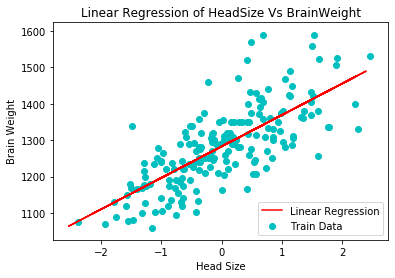

In [564]:

plt.title('Linear Regression of HeadSize Vs BrainWeight')
plt.plot(x_test,pred_val,color='r',label='Linear Regression')
plt.scatter(x_train,y_train,color='c',label='Train Data')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.legend(loc='lower right')
plt.show()